In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\Real Estate Valuation\Real estate valuation data set.xlsx')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


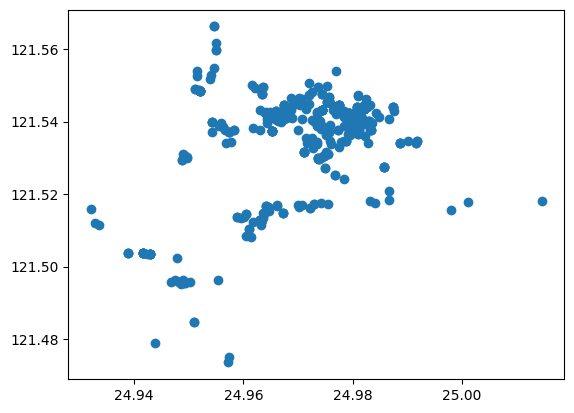

In [4]:
plt.scatter(x = df['X5 latitude'] , y = df['X6 longitude']); # We can do unsupervised and group them later.

In [5]:
df.describe().T # X3 std is high.

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
X2 house age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
X4 number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
X5 latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
X6 longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Y house price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


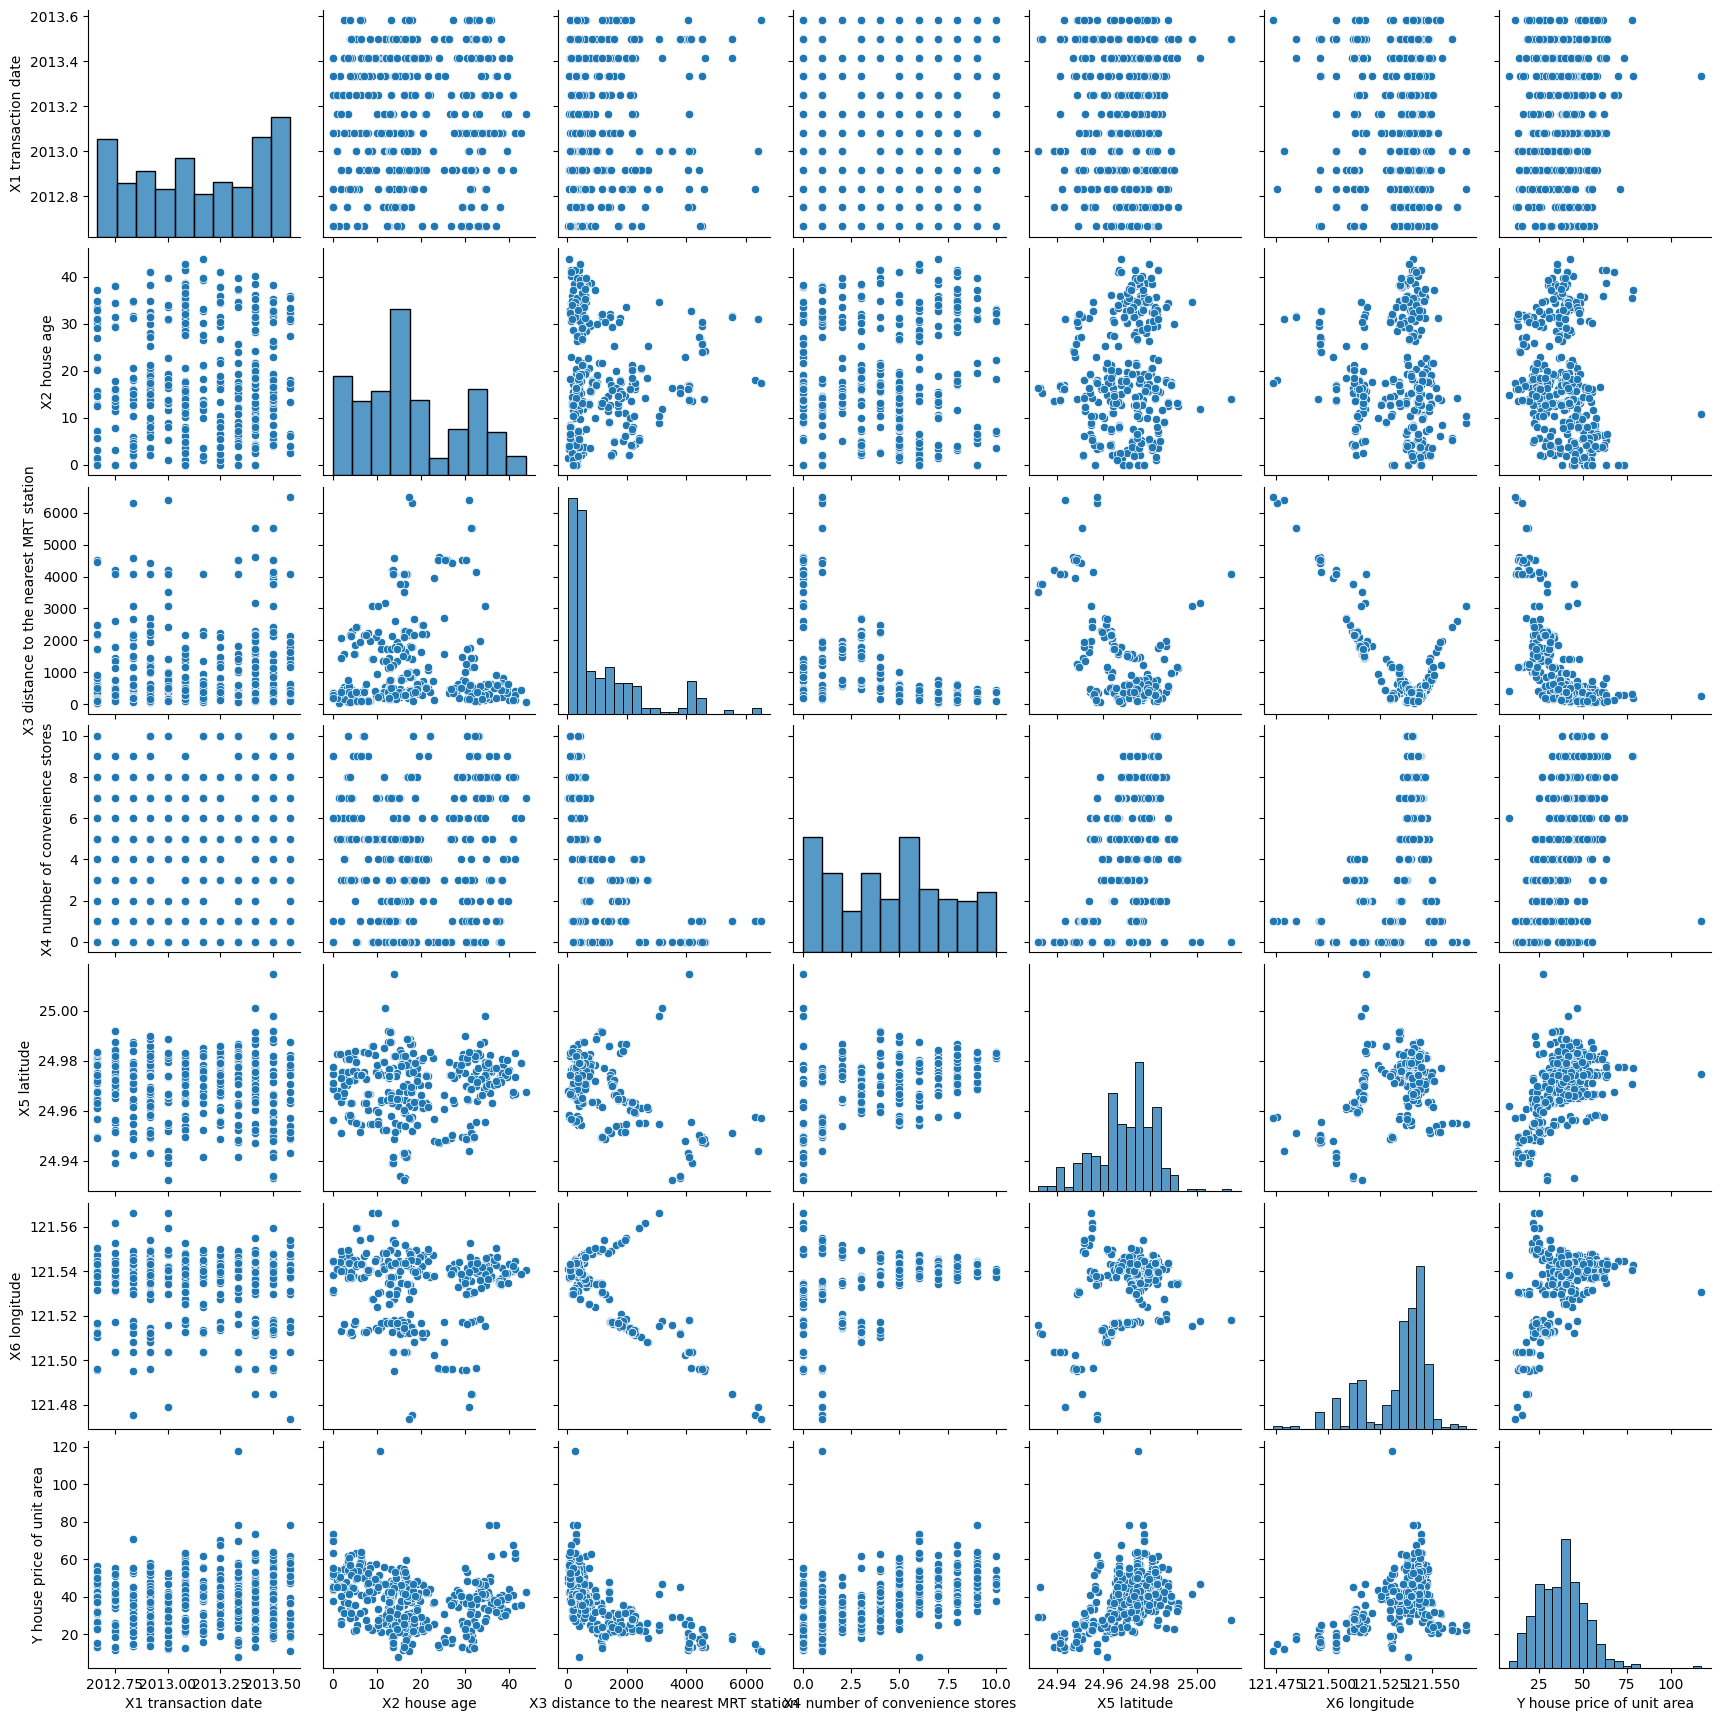

In [6]:
sns.pairplot(df);

In [7]:
df[df['Y house price of unit area'] == df['Y house price of unit area'].max()] # Can consider as an outlier 270.index

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5


In [8]:
df[df['Y house price of unit area'] < 10] # Can consider as an outlier 113.index

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
113,2013.333333,14.8,393.2606,6,24.96172,121.53812,7.6


In [9]:
# outliers = [113,270]

# df.drop(outliers , axis = 0 , inplace= True)
# df.reset_index(inplace= True , drop = True)
# df.head()

In [10]:
# df.drop('X1 transaction date' ,axis=1 , inplace=True) 

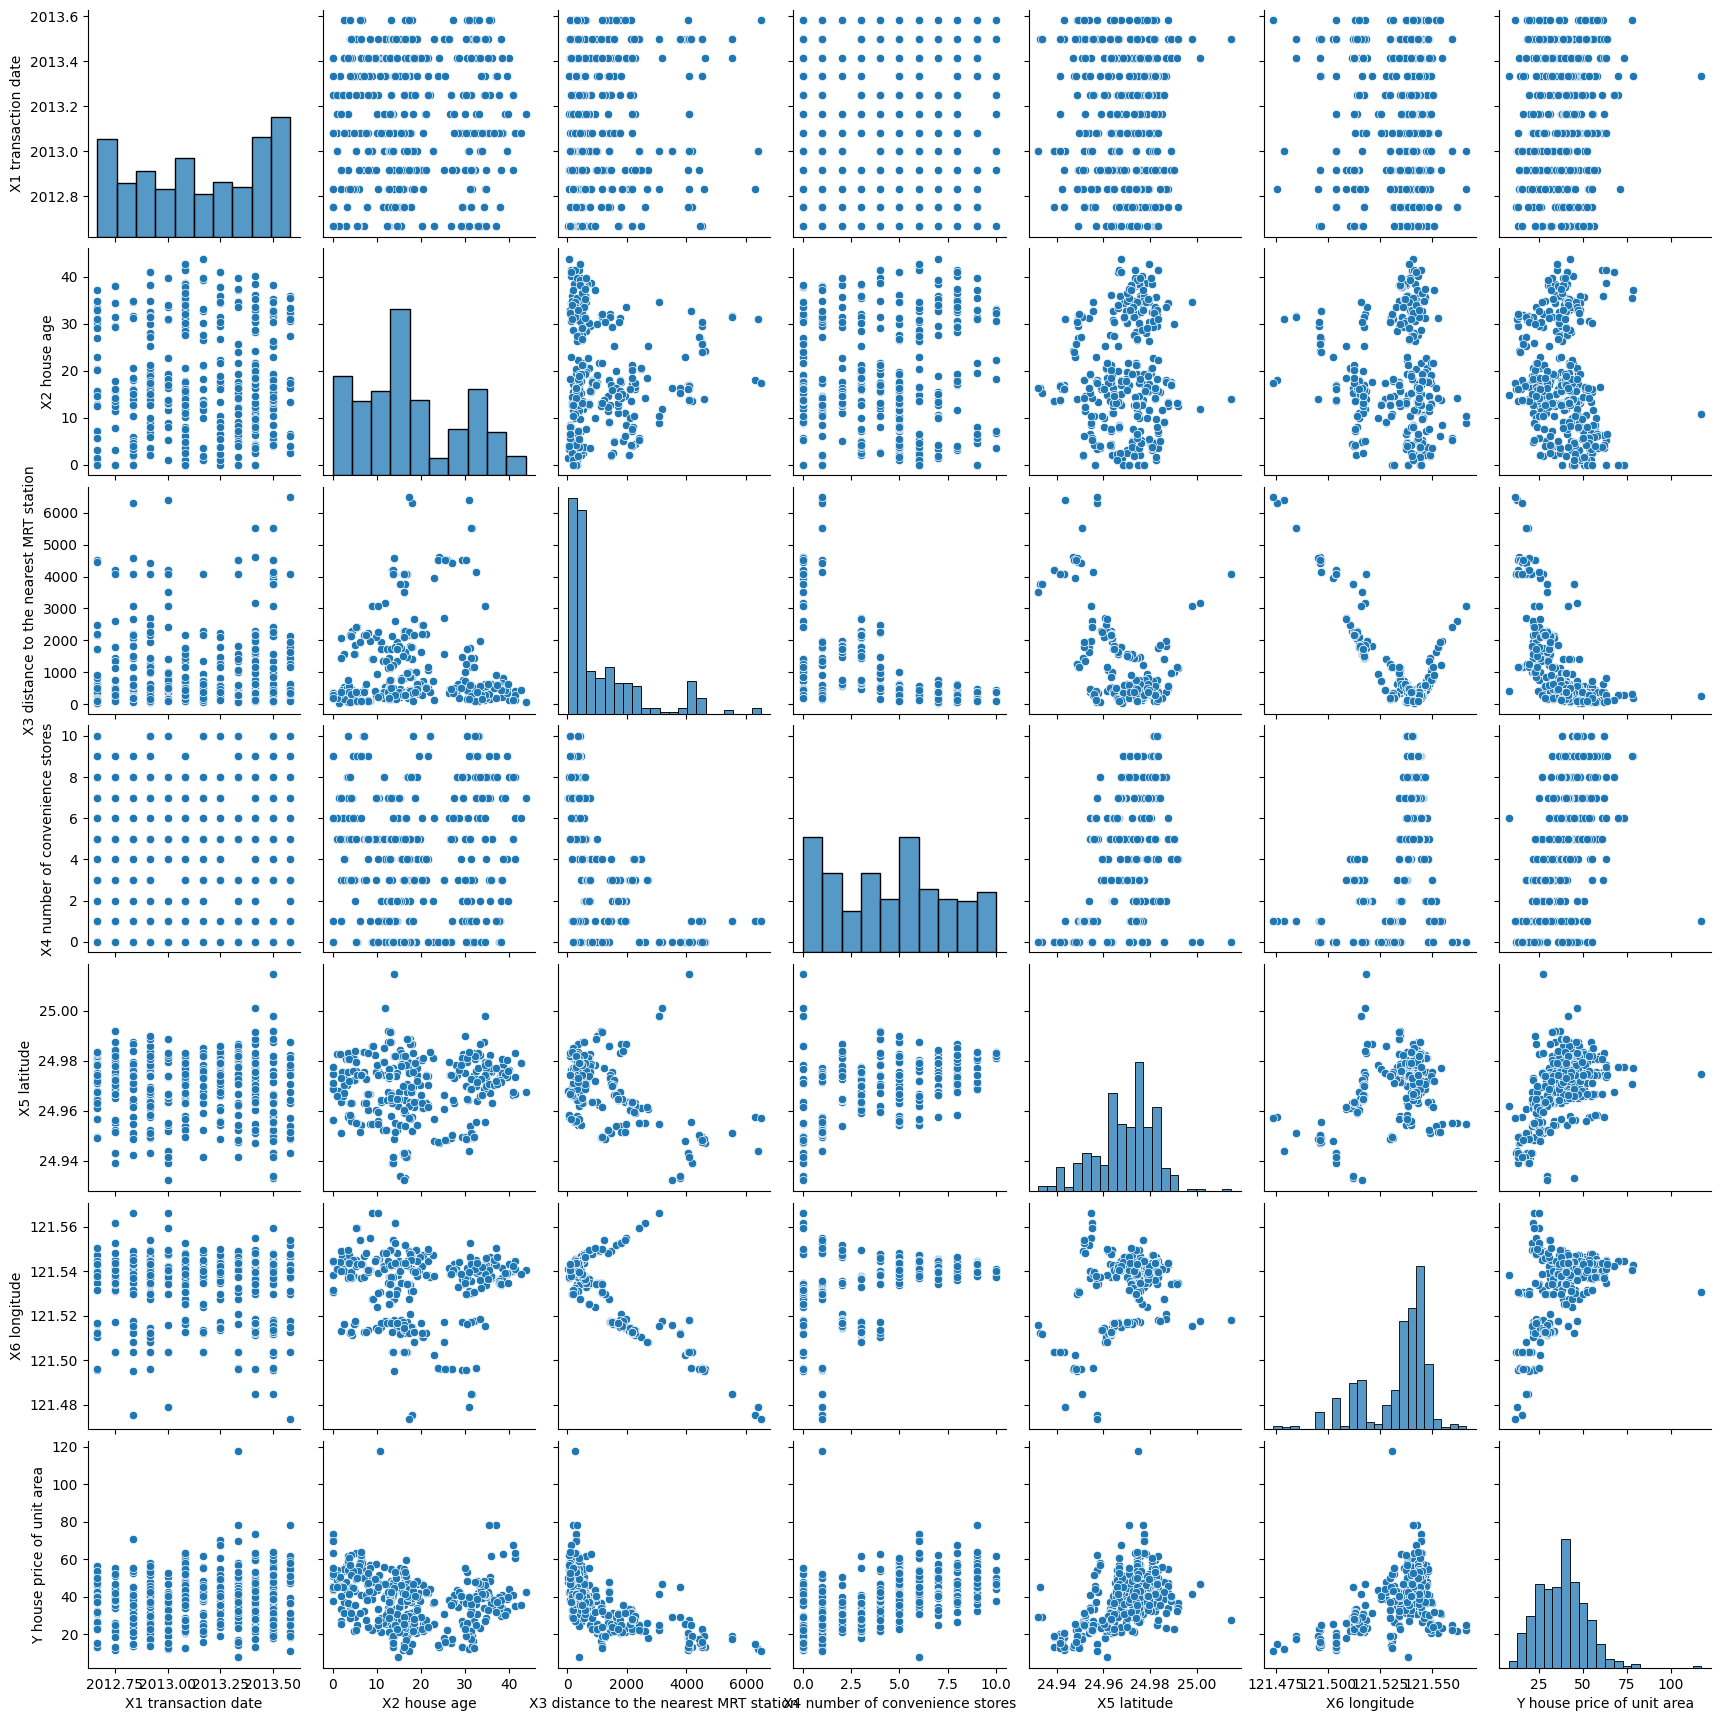

In [11]:
sns.pairplot(df);

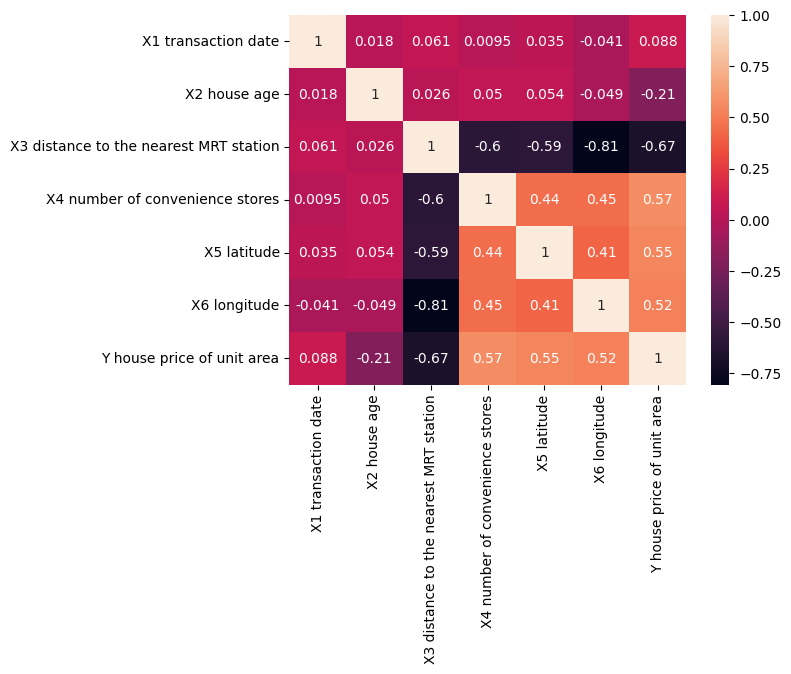

In [12]:
sns.heatmap(df.corr() , annot= True); # We can change X1 transaction date to categoric.

### Utils

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Y house price of unit area'
    
    def trainTest(data , label=label , test_size = 0.2):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Y house price of unit area'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        X = data.drop(label ,axis = 1)
        y = data[label]
        X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test
    
    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, R2, MAE, RMSE ve MSE skorlarını yazdırır.
        Sadece Regression taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train R2 , Train MAE , Train RMSE , Train MSE ,  Test R2 , Test MAE , Test RMSE , Test MSE
        """
        
        print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
        print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
        print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
        print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
        
        
        print("\n****************\n")
        
        print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
        print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
        print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
        print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
        
    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional
            Datamızın task'i, by default 'classification'.
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , average='weighted'),
            "Precision" : precision_score(y_train, y_train_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , average='weighted'))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , average='weighted'),
            "Precision" : precision_score(y_test, y_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_test, y_pred , average='weighted'))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

### Train | Test Split

In [14]:
X_train , X_test , y_train , y_test = fonks.trainTest(df , label='Y house price of unit area' , test_size=0.2)

# Models

### Linear Model

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)

fonks.simple_scores(y_train, lr_train_pred , y_test , lr_pred , 'LR')

LR Train R2 : 0.5750555883998283
LR Train Mae : 6.0369162102366
LR Train RMSE : 8.849414487203422
LR Train MSE : 78.3121367663258

****************

LR Test R2 : 0.6088917897996652
LR Test Mae : 6.542110746058706
LR Test RMSE : 8.534694779494577
LR Test MSE : 72.84101497913198


In [16]:
lr_df = fonks.train_test_df(y_train, lr_train_pred , y_test , lr_pred , 'LR')
lr_df

,LR_train,LR_test
R2,0.575056,0.608892
mae,6.036916,6.542111
mse,78.312137,72.841015
rmse,8.849414,8.534695


### Ridge Model

In [17]:
from sklearn.linear_model import RidgeCV

rdg = RidgeCV(alphas=np.arange(0.001,100,1) , cv = 3)

rdg.fit(X_train , y_train)

print(f"Ridge Best Score : {rdg.best_score_}")
print(f"Ridge Best Alpha : {rdg.alpha_}")

Ridge Best Score : 0.5549521653243055
Ridge Best Alpha : 0.001


In [18]:
rdg_train_pred = rdg.predict(X_train)
rdg_pred = rdg.predict(X_test)

fonks.simple_scores(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')

Ridge Train R2 : 0.5750298206701785
Ridge Train Mae : 6.037534809257489
Ridge Train RMSE : 8.849682788017766
Ridge Train MSE : 78.31688544853789

****************

Ridge Test R2 : 0.6090548706704958
Ridge Test Mae : 6.544141109768464
Ridge Test RMSE : 8.53291523288734
Ridge Test MSE : 72.81064237164082


In [19]:
rdg_df = fonks.train_test_df(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')
all_df = pd.concat([lr_df , rdg_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test
R2,0.575056,0.608892,0.575030,0.609055
mae,6.036916,6.542111,6.037535,6.544141
mse,78.312137,72.841015,78.316885,72.810642
rmse,8.849414,8.534695,8.849683,8.532915


### Lasso Model

In [20]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=np.arange(0.001,100,1) , cv = 3)

lasso.fit(X_train , y_train)

print(f"Lasso Best Coef : {lasso.coef_}")
print(f"Lasso Best Alpha : {lasso.alpha_}")

Lasso Best Coef : [ 4.71833456e+00 -2.74962794e-01 -4.30655599e-03  1.23380838e+00
  2.21126441e+02 -7.41783850e-01]
Lasso Best Alpha : 0.001


In [21]:
lasso_train_pred = lasso.predict(X_train)
lasso_pred = lasso.predict(X_test)

fonks.simple_scores(y_train, lasso_train_pred , y_test , lasso_pred , 'Lasso')

Lasso Train R2 : 0.5749387107228532
Lasso Train Mae : 6.045179143304358
Lasso Train RMSE : 8.85063138507337
Lasso Train MSE : 78.33367591444576

****************

Lasso Test R2 : 0.609048341734668
Lasso Test Mae : 6.564148514376644
Lasso Test RMSE : 8.532986484092694
Lasso Test MSE : 72.8118583377086


In [22]:
lasso_df = fonks.train_test_df(y_train, lasso_train_pred , y_test , lasso_pred , 'Lasso')
all_df = pd.concat([all_df , lasso_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986


### Polynomial Model

### SVR Model

In [23]:
# from sklearn.svm import SVR

# svr_base = SVR()

# params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4,5] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

# svr_grid = GridSearchCV(svr_base , params , scoring='neg_mean_squared_error' , cv = 5)
# svr_grid.fit(X_train , y_train)

# print(f'Best parameters: {svr_grid.best_params_}')
# print(f'Best score: {svr_grid.best_score_:.2f}')

In [24]:
# from sklearn.svm import SVR
# from sklearn.model_selection import RandomizedSearchCV

# svr_base = SVR()

# params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4,5] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,1) }

# svr_grid = RandomizedSearchCV(svr_base , params , scoring='neg_mean_squared_error' , cv = 3 , n_iter= 20)
# svr_grid.fit(X_train , y_train)

# print(f'Best parameters: {svr_grid.best_params_}')
# print(f'Best score: {svr_grid.best_score_:.2f}')

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C=300 , gamma='scale')
svr.fit(X_train , y_train)

svr_train_pred = svr.predict(X_train)
svr_pred = svr.predict(X_test)

fonks.simple_scores(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

SVR Train R2 : 0.5886405712361595
SVR Train Mae : 5.6498793893808745
SVR Train RMSE : 8.70681273805002
SVR Train MSE : 75.80858805547008

****************

SVR Test R2 : 0.5831188683901033
SVR Test Mae : 6.3030153389837755
SVR Test RMSE : 8.811414824164853
SVR Test MSE : 77.64103120351213


In [26]:
svr_df = fonks.train_test_df(y_train, svr_train_pred , y_test , svr_pred , 'SVR')
all_df = pd.concat([all_df , svr_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415


### Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_base = DecisionTreeRegressor(random_state= 53)

params = {'max_depth' : np.arange(2,7) , 'min_samples_split' : np.arange(2,6)}

dt_grid = GridSearchCV(dt_base , params , cv = 3 , scoring= 'neg_root_mean_squared_error' )
dt_grid.fit(X_train , y_train)

print(f"DT Best Params is : {dt_grid.best_params_}")
print(f"DT Best Score is : {dt_grid.best_score_}")

DT Best Params is : {'max_depth': 4, 'min_samples_split': 5}
DT Best Score is : -8.212797085508996


In [28]:
dt = DecisionTreeRegressor(max_depth=3 , min_samples_split=2 , random_state= 53)
dt.fit(X_train , y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred , 'DT')

DT Train R2 : 0.6907026689906703
DT Train Mae : 5.1594880629040265
DT Train RMSE : 7.54981938445733
DT Train MSE : 56.99977273792766

****************

DT Test R2 : 0.6227786103265819
DT Test Mae : 6.294860819046948
DT Test RMSE : 8.381807516273927
DT Test MSE : 70.2546972398661


In [29]:
dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808


### RandomForest Model

In [30]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV

# rf_base = RandomForestRegressor()

# params = {'n_estimators' : np.arange(80,1000,10) , 'max_depth' : np.arange(2,11) , 'max_features' : np.arange(2,6) , 'min_samples_split' : [2,3]}

# rf_rnd = RandomizedSearchCV(rf_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter = 30)
# rf_rnd.fit(X_train , y_train)

# print(f"RF Best Params is : {rf_rnd.best_params_}")
# print(f"RF Best Score is : {rf_rnd.best_score_}")

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_estimators = 880 , max_depth=5 , min_samples_split=2 , max_features=2)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train R2 : 0.8524301553273916
RF Train Mae : 3.583245574143544
RF Train RMSE : 5.214915622642734
RF Train MSE : 27.195344951283253

****************

RF Test R2 : 0.7315686560867427
RF Test Mae : 5.196910788367061
RF Test RMSE : 7.070597914194878
RF Test MSE : 49.99335486421696


In [32]:
rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779,0.852430,0.731569
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861,3.583246,5.196911
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697,27.195345,49.993355
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808,5.214916,7.070598


### Gradient Boosting

In [33]:
# from sklearn.ensemble import GradientBoostingRegressor

# gb_base = GradientBoostingRegressor()

# params = {'n_estimators' : np.arange(80,1000,10) , 'learning_rate' : [0.001,0.01,0.1,1] , 'subsample' : [0.8 , 1] , 'max_depth' : np.arange(2,11)}

# gb_rnd = RandomizedSearchCV(gb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter=50)
# gb_rnd.fit(X_train , y_train)

# print(f"GB Best Params is : {gb_rnd.best_params_}")
# print(f"GB Best Score is : {gb_rnd.best_score_}")

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators= 400 , max_depth=2 , learning_rate= 0.01 , subsample= 1 )
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train R2 : 0.7773659261093312
GB Train Mae : 4.129327516269092
GB Train RMSE : 6.405371049086419
GB Train MSE : 41.02877827647445

****************

GB Test R2 : 0.74504940236846
GB Test Mae : 5.102079936496002
GB Test RMSE : 6.890766681102519
GB Test MSE : 47.48266545339263


In [35]:
gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779,0.852430,0.731569,0.777366,0.745049
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861,3.583246,5.196911,4.129328,5.102080
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697,27.195345,49.993355,41.028778,47.482665
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808,5.214916,7.070598,6.405371,6.890767


### XGB Model

In [36]:
# from xgboost import XGBRegressor

# xgb_base = XGBRegressor(tree_method = 'gpu_hist')

# params = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8],
#     'reg_alpha': [0, 0.01, 0.05],
#     'reg_lambda': [0, 0.01, 0.05],
# }

# params2 = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'gamma': [0, 1, 5, 10],
#     'min_child_weight': [1, 3, 5, 7],
#     'scale_pos_weight': [1, 2, 3, 4, 5]
# }

# xgb_rnd = RandomizedSearchCV(xgb_base , params2 , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter= 100)
# xgb_rnd.fit(X_train , y_train)

# print(f"XGB Best Params is : {xgb_rnd.best_params_}")
# print(f"XGB Best Score is : {xgb_rnd.best_score_}")

In [37]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 100 , min_child_weight = 2 , max_depth = 2 , learning_rate = 0.1 , gamma = 5, colsample_bytree = 0.7 , subsample= 1 , scale_pos_weight = 2)
xgb.fit(X_train , y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train R2 : 0.8203669316021959
XGB Train Mae : 3.692623698531321
XGB Train RMSE : 5.753625891094253
XGB Train MSE : 33.10421089467014

****************

XGB Test R2 : 0.739406093421316
XGB Test Mae : 5.151271273141885
XGB Test RMSE : 6.9666125238089025
XGB Test MSE : 48.53369005689105


In [38]:
xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779,0.852430,0.731569,0.777366,0.745049,0.820367,0.739406
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861,3.583246,5.196911,4.129328,5.102080,3.692624,5.151271
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697,27.195345,49.993355,41.028778,47.482665,33.104211,48.533690
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808,5.214916,7.070598,6.405371,6.890767,5.753626,6.966613


### CatBoost Model

In [39]:
params = {'learning_rate': 0.03,
          'objective':'MAE',
          'depth': 6,
          'early_stopping_rounds':1000,
          'iterations': 10000,
          'use_best_model': True,
          'eval_metric': "RMSE",
          'random_state': 986,
          'allow_writing_files': False,
          'thread_count':24
          }

In [40]:
# X_train['X1 transaction date'] = X_train['X1 transaction date'].astype(int).astype('category')
# X_test['X1 transaction date'] = X_test['X1 transaction date'].astype(int).astype('category')

In [41]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(**params,
                #        cat_features=['X1 transaction date']
                        )
cb.fit(X_train,y_train,
        eval_set=[(X_test,y_test)],
        verbose=500)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CB')

0:	learn: 13.3340701	test: 13.4268665	best: 13.4268665 (0)	total: 147ms	remaining: 24m 27s
500:	learn: 4.9236673	test: 7.2084244	best: 7.0519444 (277)	total: 432ms	remaining: 8.19s
1000:	learn: 4.0661796	test: 7.4064709	best: 7.0519444 (277)	total: 711ms	remaining: 6.39s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 7.051944388
bestIteration = 277

Shrink model to first 278 iterations.
CB Train R2 : 0.8303110317833284
CB Train Mae : 2.645960275476525
CB Train RMSE : 5.592104523713752
CB Train MSE : 31.271633004139808

****************

CB Test R2 : 0.7329831362667837
CB Test Mae : 5.077594302217679
CB Test RMSE : 7.051944297826375
CB Test MSE : 49.72991837964592


In [42]:
cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,CB_train,CB_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779,0.852430,0.731569,0.777366,0.745049,0.820367,0.739406,0.830311,0.732983
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861,3.583246,5.196911,4.129328,5.102080,3.692624,5.151271,2.645960,5.077594
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697,27.195345,49.993355,41.028778,47.482665,33.104211,48.533690,31.271633,49.729918
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808,5.214916,7.070598,6.405371,6.890767,5.753626,6.966613,5.592105,7.051944


### NN Model

In [43]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50)

model_train_pred = model.predict(X_train)
model_pred = model.predict(X_test)

fonks.simple_scores(y_train, model_train_pred , y_test , model_pred , 'Model')

Epoch 1/50
11/11 [==============================] - 1s 1ms/step - loss: 4848.0693
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 1651.8661
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 438.1351
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 237.9644
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 187.6662
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 135.4256
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 108.4997
Epoch 8/50
11/11 [==============================] - 0s 1ms/step - loss: 96.3675
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 91.2515
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 90.8188
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 88.3213
Epoch 12/50
11/11 [==============================] - 0s 2ms/step - loss: 84.4055
Epoch 13/50
11/11 [=========

In [44]:
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,CB_train,CB_test
R2,0.575056,0.608892,0.575030,0.609055,0.574939,0.609048,0.588641,0.583119,0.690703,0.622779,0.852430,0.731569,0.777366,0.745049,0.820367,0.739406,0.830311,0.732983
mae,6.036916,6.542111,6.037535,6.544141,6.045179,6.564149,5.649879,6.303015,5.159488,6.294861,3.583246,5.196911,4.129328,5.102080,3.692624,5.151271,2.645960,5.077594
mse,78.312137,72.841015,78.316885,72.810642,78.333676,72.811858,75.808588,77.641031,56.999773,70.254697,27.195345,49.993355,41.028778,47.482665,33.104211,48.533690,31.271633,49.729918
rmse,8.849414,8.534695,8.849683,8.532915,8.850631,8.532986,8.706813,8.811415,7.549819,8.381808,5.214916,7.070598,6.405371,6.890767,5.753626,6.966613,5.592105,7.051944


In [ ]:
# CatBoost was better a little bit. But most of models around %62-73 R2 score.
# GB have 74.5 with outliers.
# We need to do something more at EDA.

In [ ]:
# Done.